In [5]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset = pd.read_csv("adult.csv")
initial_no_rows = dataset.shape[0]
dataset = dataset.replace({'?':np.nan}).dropna()
clean_no_rows = dataset.shape[0]
print("Number of rows in the original dataset: {}".format(initial_no_rows))
print("Number of rows deleted: {}".format(initial_no_rows - clean_no_rows))
print("Number of rows in the clean dataset: {}".format(clean_no_rows))

Number of rows in the original dataset: 48842
Number of rows deleted: 3620
Number of rows in the clean dataset: 45222


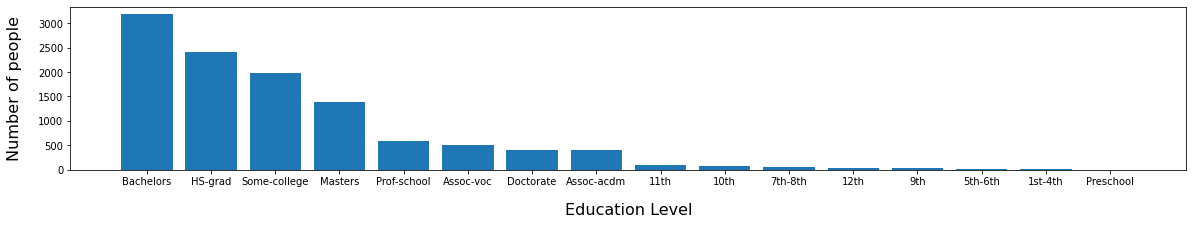

In [10]:
above_50k = dataset[dataset['income'].str.contains(">50K")]
counts = above_50k['education'].value_counts()
education_levels = counts.index

plt.figure(figsize=(20, 3))
plt.xlabel("Education Level", labelpad=16, fontsize=16)
plt.ylabel("Number of people", labelpad=16, fontsize=16)
plt.bar(education_levels, counts)
plt.savefig("fig1.png")
plt.show()

In [36]:
races = ['White', 'Black', 'Asian-Pac-Islander']

for race in races:
    print("Conditional probability 1 (>50K) for {} race".format(race))
    nominator_query = "SELECT count(*) FROM dataset WHERE race='{}' and income='>50K';".format(race)
    nominator = sqldf(nominator_query).iloc[0].values[0]
    print("Nominator is: {}".format(nominator))
    denominator_query = "SELECT count(*) FROM dataset WHERE race='{}';".format(race)
    denominator = sqldf(denominator_query).iloc[0].values[0]
    print("Denominator is: {}".format(denominator))
    print("Probability is: {}\n".format(nominator / denominator))

Conditional probability 1 (>50K) for White race
Nominator is: 10207
Denominator is: 38903
Probability is: 0.2623705112716243

Conditional probability 1 (>50K) for Black race
Nominator is: 534
Denominator is: 4228
Probability is: 0.12630085146641437

Conditional probability 1 (>50K) for Asian-Pac-Islander race
Nominator is: 369
Denominator is: 1303
Probability is: 0.2831926323867997



In [37]:
races = ['White', 'Black', 'Asian-Pac-Islander']

for race in races:
    print("Conditional probability 2 (<=50K) for {} race".format(race))
    nominator_query = "SELECT count(*) FROM dataset WHERE race='{}' and income='<=50K';".format(race)
    nominator = sqldf(nominator_query).iloc[0].values[0]
    print("Nominator is: {}".format(nominator))
    denominator_query = "SELECT count(*) FROM dataset WHERE race='{}';".format(race)
    denominator = sqldf(denominator_query).iloc[0].values[0]
    print("Denominator is: {}".format(denominator))
    print("Probability is: {}\n".format(nominator / denominator))

Conditional probability 2 (<=50K) for White race
Nominator is: 28696
Denominator is: 38903
Probability is: 0.7376294887283757

Conditional probability 2 (<=50K) for Black race
Nominator is: 3694
Denominator is: 4228
Probability is: 0.8736991485335857

Conditional probability 2 (<=50K) for Asian-Pac-Islander race
Nominator is: 934
Denominator is: 1303
Probability is: 0.7168073676132003

